# Anàlisi de dades

In [1]:
import sys
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
pd.set_option('display.max_columns', 500)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\api_scraping")
    sys.path.append(module_path+"\\functions")

from user_functions import *
import sqlite3
from sklearn.metrics import silhouette_score

In [2]:
# ens conectem a la base de dades i creem el dataset
conn = sqlite3.connect("../../data/database/song_database.db")
dataset = pd.read_sql_query("SELECT * FROM songs2", conn)

In [3]:
dataset.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

##### Descripció de les dades:

* id: L'identificador únic de la cançó.
* name: El nom de la cançó.
* album: El nom de l'àlbum al qual pertany la cançó.
* album_id: L'identificador únic de l'àlbum al qual pertany la cançó.
* artists: Una llista dels artistes que interpreten la cançó.
* artist_ids: Una llista dels identificadors únics dels artistes que interpreten la cançó.
* track_number: El número de la pista dins de l'àlbum.
* disc_number: El número del disc dins de l'àlbum.
* explicit: Un valor binari (0 o 1) que indica si la cançó conté contingut explícit.
* danceability: Una puntuació que mesura la capacitat d'una cançó per a ballar (entre 0 i 1).
* energy: Una puntuació que mesura l'energia de la cançó (entre 0 i 1).
* key: La tonalitat de la cançó en termes de claus musicals.
* loudness: La sonoritat de la cançó en decibels (dB).
* mode: La modalitat de la cançó (0 per a modalitat menor, 1 per a modalitat major).
* speechiness: Una puntuació que mesura la quantitat de parlament en la cançó (entre 0 i 1).
* acousticness: Una puntuació que mesura l'acústica de la cançó (entre 0 i 1).
* instrumentalness: Una puntuació que mesura la presència d'elements instrumentals en la cançó (entre 0 i 1).
* liveness: Una puntuació que mesura la presència d'una actuació en viu en la cançó (entre 0 i 1).
* valence: Una puntuació que mesura la positivitat o negativitat de la cançó (entre 0 i 1).
* tempo: El tempo de la cançó en pulsacions per minut (BPM).
* duration_ms: La durada de la cançó en mil·lisegons.
* time_signature: El signatura de temps de la cançó (nombre de pulsos en cada mesura).
* year: L'any de publicació de la cançó.
* release_date: La data de publicació de la cançó en format AAAA-MM-DD.

### Exploratory data analysis (EDA)
L'EDA (Exploratory Data Analysis), en català Anàlisi Exploratori de Dades, és una fase important en el procés d'exploració de conjunts de dades. Consisteix en examinar i comprendre les característiques fonamentals de les dades utilitzant tècniques estadístiques i visualitzacions gràfiques. L'objectiu principal de l'EDA és descobrir patrons, identificar anomalies, obtenir intuïció i generar hipòtesis sobre les dades abans d'aplicar tècniques més complexes d'anàlisi.

Durant l'EDA, es realitzen diverses tasques, com ara:

- Resum estadístic: Es calculen mesures com la mitjana, la mediana, la desviació estàndard i altres estadístiques per entendre la distribució i les tendències de les dades.
- Visualització de dades: Es creen gràfics i diagrames per representar visualment les relacions, les distribucions i els patrons de les dades. Això pot incloure histogrames, diagrames de dispersió, gràfics de barres, entre altres.
- Exploració de variables: Es realitzen anàlisis individuals de les variables per comprendre les seves característiques i la seva relació amb altres variables. Això pot incloure l'anàlisi de correlació, la identificació de valors atípics i la detecció de patrons.
- Tractament de valors perduts o inconsistents: Es revisen les dades per identificar valors perduts o inconsistents, i se'ls pot tractar mitjançant tècniques com l'imputació de dades o l'eliminació de mostres defectuoses.
- Creació de noves variables: Es poden crear noves variables derivades de les dades originals per aprofundir en l'anàlisi i afegir informació addicional.
- Comprovació d'hipòtesis preliminars: S'utilitzen mètodes estadístics per comprovar les hipòtesis o suposicions inicials sobre les dades i validar-les.
- Identificació de reptes o limitacions: Es determinen possibles reptes o limitacions de les dades, com ara la manca de representativitat, el desequilibri de mostres o altres factors que poden afectar la interpretació dels resultats.
- etc.

In [4]:
# comprovem si tenim algun valor null al dataset
dataset.isnull().values.any()

False

In [5]:
# mostrem estadístiques de les columnes numèriques
summary_stats = dataset.describe()
print(summary_stats)

       track_number   disc_number      explicit  danceability        energy  \
count  1.204692e+06  1.204692e+06  1.204692e+06  1.204692e+06  1.204692e+06   
mean   7.654632e+00  1.055881e+00  6.864659e-02  4.930533e-01  5.096468e-01   
std    5.994405e+00  2.953079e-01  2.528523e-01  1.896486e-01  2.946997e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  1.000000e+00  0.000000e+00  3.560000e-01  2.520000e-01   
50%    7.000000e+00  1.000000e+00  0.000000e+00  5.010000e-01  5.240000e-01   
75%    1.000000e+01  1.000000e+00  0.000000e+00  6.330000e-01  7.670000e-01   
max    5.000000e+01  1.300000e+01  1.000000e+00  1.000000e+00  1.000000e+00   

                key      loudness          mode   speechiness  acousticness  \
count  1.204692e+06  1.204692e+06  1.204692e+06  1.204692e+06  1.204692e+06   
mean   5.194158e+00 -1.180598e+01  6.714588e-01  8.437000e-02  4.466315e-01   
std    3.536671e+00  6.981789e+00  4.696830e-01  1.

C:\Users\jordi\AppData\Local\Temp\ipykernel_12748\1650319217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


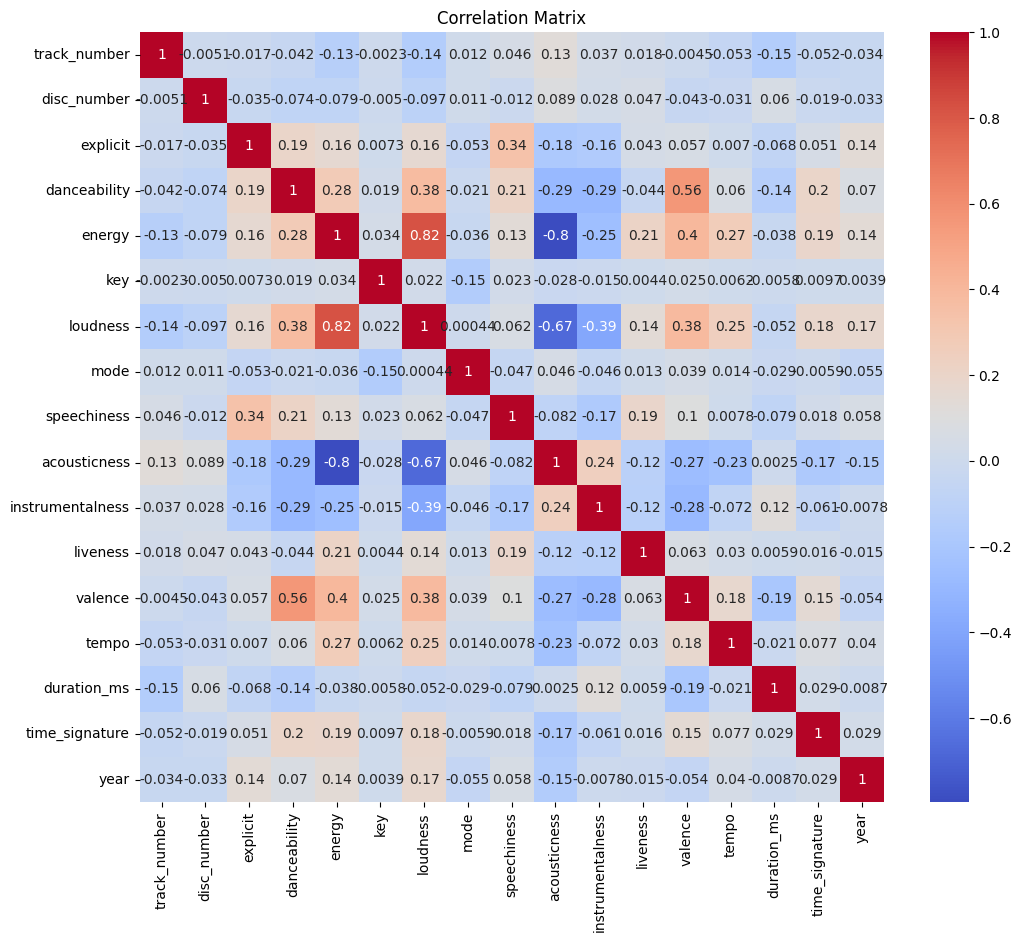

In [6]:
# matriu de correlacions
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Com podem comprovar, no ens trobem amb una gran correlació entre totes les variables, cosa que ja ens fa veure de primeres que algunes d'elles seràn prescindibles. Destaquem, però, la gran relació positiva entre 'loudness' i 'energy' i la correlació negativa entre 'acousticness' i 'energy'.

#### Visualitzacions

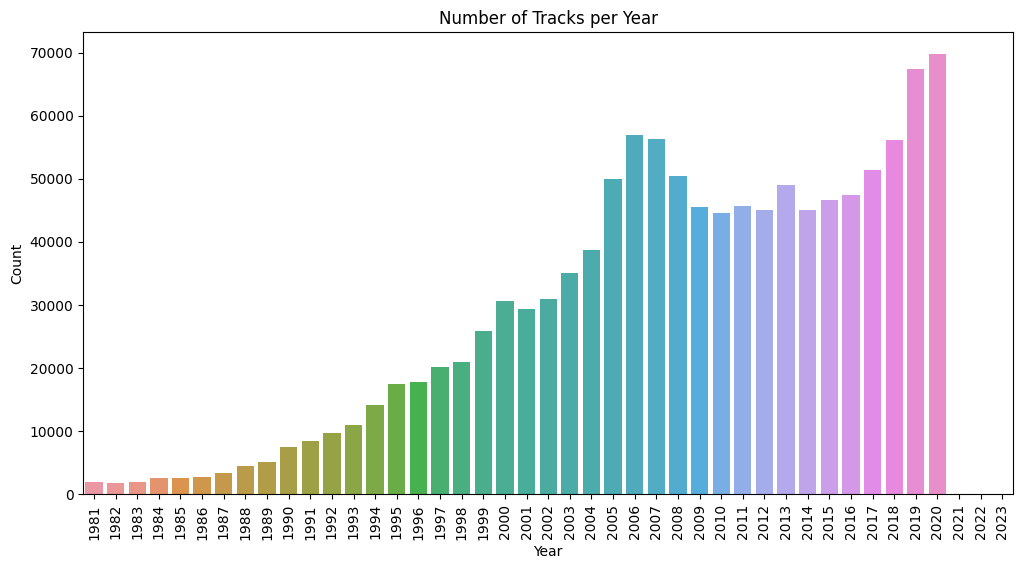

In [7]:
# número de cançons per any
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=dataset.loc[dataset.year > 1980])
plt.title('Number of Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

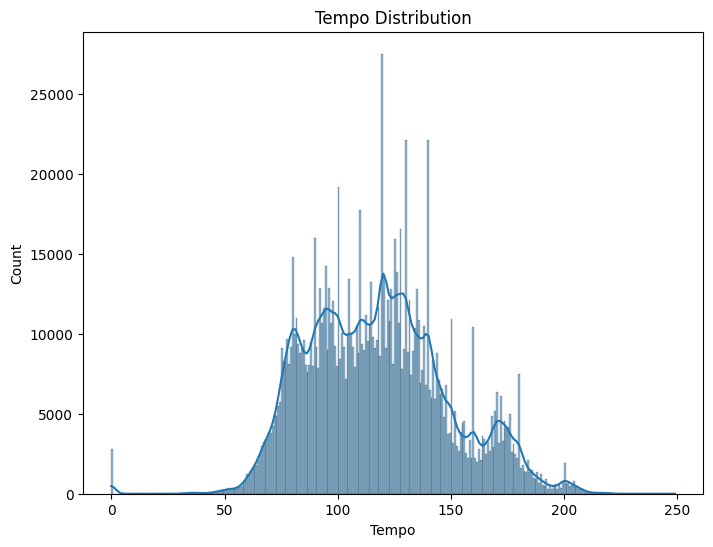

In [8]:
# histograma de distribució del tempo
plt.figure(figsize=(8, 6))
sns.histplot(dataset['tempo'], kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()

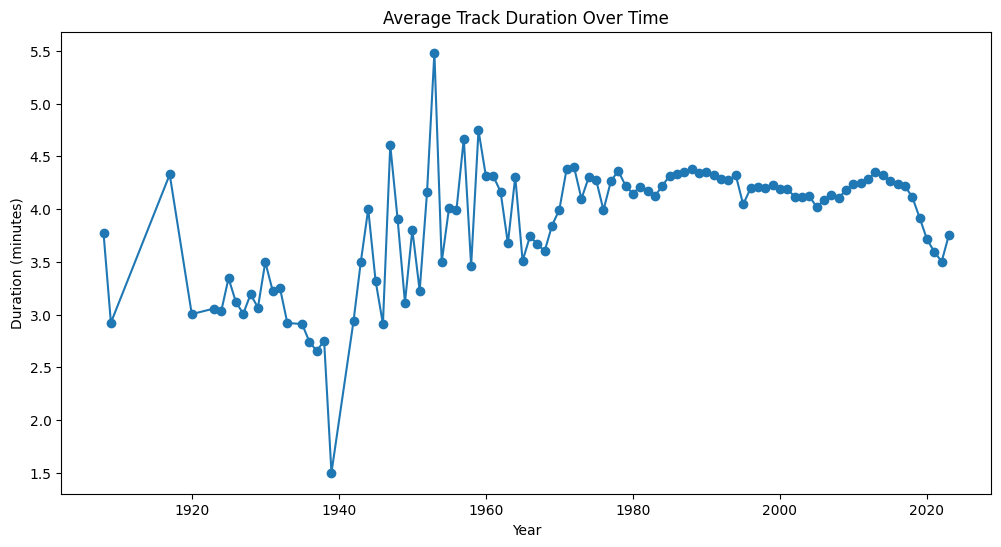

In [9]:
# evolució de la duració de les cançons 
avg_duration_by_year = dataset.loc[dataset.year > 1900].groupby('year')['duration_ms'].mean() / 60000  # Convert duration to minutes
plt.figure(figsize=(12, 6))
avg_duration_by_year.plot(marker='o')
plt.title('Average Track Duration Over Time')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.show()

<Axes: xlabel='mode', ylabel='count'>

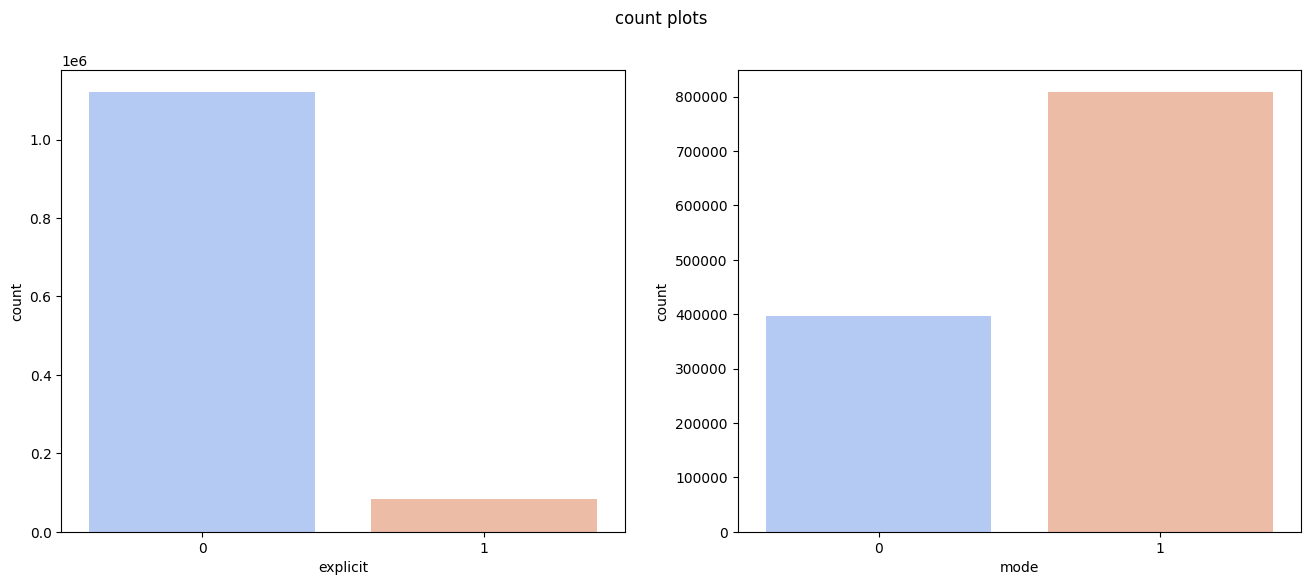

In [10]:
# repartició de les cançons explicites i dels modes (menor i major)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('count plots')

sns.countplot(ax=axes[0],x='explicit',data=dataset,palette='coolwarm')
sns.countplot(ax=axes[1],x='mode',data=dataset,palette='coolwarm')

In [11]:
'''
dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')
dataset['year'] = dataset['release_date'].apply(lambda time: time.year)
dataset = dataset.dropna()'''

"\ndataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')\ndataset['year'] = dataset['release_date'].apply(lambda time: time.year)\ndataset = dataset.dropna()"

In [12]:
# llista de tots els atributs que tenim disponibles per l'elaboració dels models
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature', 'year']

In [13]:
df = dataset[features]
df.dropna()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999
1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999
2,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999
3,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999
4,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204687,0.447,0.945,3,-4.016,1,0.0788,0.01150,0.011400,0.0707,0.307,111.266,267907,4.0,1997
1204688,0.430,0.915,7,-3.820,1,0.0377,0.00086,0.000003,0.0837,0.415,144.147,205947,4.0,2008
1204689,0.442,0.893,0,-4.878,1,0.0505,0.00844,0.000000,0.5290,0.712,148.119,168000,4.0,1999
1204690,0.490,0.679,8,-3.680,1,0.0309,0.00394,0.000015,0.0383,0.506,167.046,261267,4.0,2004


# Clustering

L'agrupament, o clustering en anglès, és un mètode d'anàlisi de dades no supervisat que consisteix en agrupar les observacions en conjunts o clústers basats en les seves similituds intrínseques. L'objectiu principal del clustering és descobrir estructures ocultes o patrons en les dades sense tenir informació prèvia sobre les categories o etiquetes de cada observació.

En altres paraules, el clustering agrupa les dades segons les seves característiques i la seva proximitat relativa en un espai multidimensional. Les observacions dins del mateix clúster són més semblants entre si i diferents de les observacions d'altres clústers.

Els algoritmes de clustering analitzen les dades per mesurar les similituds o distàncies entre les observacions i assignar-les a clústers basant-se en aquestes mesures. Hi ha diverses tècniques de clustering com ara el K-means, l'agrupament jeràrquic, el DBSCAN, l'algoritme de la mitjana de les coordenades i molts altres. Cada tècnica té els seus propis mètodes per determinar la similitud i els criteris per crear els clústers.

El clustering té una àmplia gamma d'aplicacions en diversos camps, com l'anàlisi de mercat, la segmentació de clients, la genòmica, la visió per computador, l'anàlisi de xarxes socials i molts altres. Aquesta tècnica és una eina valuosa per a l'exploració i comprensió de les dades, així com per a la presa de decisions i la generació de coneixement nou.

En aquest projecte s'han provat 5 mètodes diferents de clústering:
- Kmeans
- BIRCH
- MiniBatchKmeans
- C means
- Gausian Mixture


El primer que fem abans de provar aquest mètodes és reduïr les nostres dades originals a un subset. Això ens permetrà realitzar els càlculs de manera més ràpida. Quan haguem determinat quin algoritme és el millor, l'entrenarem amb la totalitat de les dades. Per ara utilitzarem tots els atributs que tenim.

In [14]:
df = df.sample(10000, random_state=42)

### Standard Scaler
Escalar les dades abans de realitzar l'agrupament és un pas important en el procés de clustering. L'escalat de les dades té com a objectiu estandarditzar les variables perquè tinguin la mateixa escala o rang de valors. Aquest procés té diversos beneficis en l'anàlisi de clustering:

- Eliminació de biaixos: Les variables amb valors més grans poden dominar el procés de clustering, ja que les distàncies o similituds es calculen en funció de les magnituds absolutes. L'escalat de les dades permet eliminar aquest biaix i assegurar que totes les variables tinguin una influència equilibrada en el resultat final.

- Equilibri de les unitats de mesura: Si les variables tenen unitats de mesura diferents o rangs de valors molt amplis, el clustering es veurà afectat per aquestes discrepàncies. L'escalat converteix les variables a la mateixa escala, eliminant aquesta diferència i permetent una comparació més justa entre les variables.

- Millora de l'eficàcia dels algoritmes: Alguns algoritmes de clustering, com el K-means, es basen en la distància euclidiana per calcular les similituds entre les observacions. L'escalat de les dades assegura que totes les variables contribueixin equitativament a aquest càlcul, millorant així l'eficàcia de l'algoritme.

- Reducció de la sensibilitat als valors atípics: Els valors atípics, que poden ser molt diferents de la resta de les dades, poden distorsionar el procés de clustering. L'escalat de les dades redueix l'efecte dels valors atípics, ja que els situa en una escala més propera als altres valors.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_X,columns=df.columns)

In [16]:
dict1 = {}

### KMEANS
K-means és un algoritme de clustering ampliament utilitzat per agrupar les observacions en un nombre predeterminat de clústers. És un mètode de clustering basat en centroides, el qual assigna cada observació al clúster amb el centroid més proper.

El funcionament de l'algoritme K-means és el següent:

- Inicialització: Es seleccionen de manera aleatòria K punts com a centroides inicials. K representa el nombre de clústers desitjat.

- Assignació: Es calcula la distància entre cada observació i els centroides i s'assigna l'observació al clúster amb el centroid més proper.

- Actualització dels centroides: Es recalcula la posició dels centroides mitjançant la mitjana de les observacions assignades a cada clúster.

-   Reassignació: Es repeteixen els passos 2 i 3 fins que les assignacions dels clústers ja no canvien o s'arriba a un nombre màxim d'iteracions.

L'objectiu principal del K-means és minimitzar la suma dels quadrats de les distàncies entre les observacions i els seus centroides corresponents. Aquesta quantitat es coneix com a inèrcia o suma de quadrats dels errors (SSE).
Per ara utilitzarem un número qualsevol de clústers. Si acaba sent el mètode escollit, determinarem quin és el número òptim d'aquests.

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, verbose=0, n_init='auto')
kmeans.fit(scaled_df)

KMeans(n_clusters=6, n_init='auto')

In [19]:
spotify_dataKmeans = dataset.sample(10000, random_state=42).copy()
spotify_dataKmeans['cluster_label'] = kmeans.predict(scaled_df)
x = metrics.calinski_harabasz_score(scaled_df, spotify_dataKmeans['cluster_label'])
print(x)
#kmeans
dict1['kmeans']=x

1021.8245605420228


### BIRCH

In [20]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=20)
brc.fit(scaled_df)
spotify_dataBrich = dataset.sample(10000, random_state=42).copy()
spotify_dataBrich['cluster_label'] = brc.predict(scaled_df)
x = metrics.calinski_harabasz_score(scaled_df, spotify_dataBrich['cluster_label'])
print(x) #BRICH
dict1['BRICH']=x

507.52950889891457


### Mini-Batch Kmeans

In [21]:
from sklearn.cluster import MiniBatchKMeans
minikmeans = MiniBatchKMeans(n_clusters=6,random_state=23,batch_size=32)

minikmeans.fit(scaled_df)
spotify_minikmeans = dataset.sample(10000, random_state=42).copy()
spotify_minikmeans['cluster_label'] = minikmeans.predict(scaled_df)
x = metrics.calinski_harabasz_score(scaled_df, spotify_minikmeans['cluster_label'])
print(x) #minibatch kmeans
dict1['minibatch kmeans']=x

884.1418976451193


e:\UOC\3r any\TFM\spotify_TFM\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Gausian Mixture Model

In [23]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(scaled_df)
spotify_gm = dataset.sample(10000, random_state=42).copy()
spotify_gm['cluster_label'] = gm.predict(scaled_df)
x=metrics.calinski_harabasz_score(scaled_df, spotify_gm['cluster_label'])
print(x)
#Gausian Mixture
dict1['Gausian Mixture']=x

433.57655915827297


### Accuracy

Per evaluar la qualitat dels diferents clusterings, hem anat registrant el seu Calinski Harabasz score. El Calinski-Harabasz score, també conegut com a índex de variança entre clústers (variance ratio criterion), és una mesura utilitzada per avaluar la qualitat del clustering o agrupament obtingut mitjançant un algoritme de clustering, com ara el K-means. Aquesta puntuació proporciona una mesura de com els clústers estan ben separats i diferenciats entre si.

El càlcul del Calinski-Harabasz score es basa en la relació entre la variància intraclúster i la variància interclúster. Una puntuació més alta indica una millor separació dels clústers i, per tant, una millor qualitat del clustering. Per a valors més alts del Calinski-Harabasz score, es considera que el clustering és millor. Això implica que els clústers estan més separats i les observacions dins del mateix clúster són més similars entre si. D'altra banda, puntuacions baixes indiquen que els clústers estan superposats o que no hi ha una clara separació entre ells.

In [24]:
m = pd.DataFrame(list(dict1.items()),columns = ['cluster','score'])
m.set_index('cluster',inplace=True)
m

,score
cluster,
kmeans,1021.824561
BRICH,507.529509
minibatch kmeans,884.141898
Gausian Mixture,433.576559


In [25]:
import plotly.express as px
fig = px.bar(m, orientation='h')
fig.show()

Com podem veure en els resultats, Kmeans és l'algoritme que millor sembla funcionar. L'escollim doncs, com a model principal.

## KMEANS

In [29]:
sse = []
k_values = range(2, 11)  # Test different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(dataset[features])
    sse.append(kmeans.inertia_)

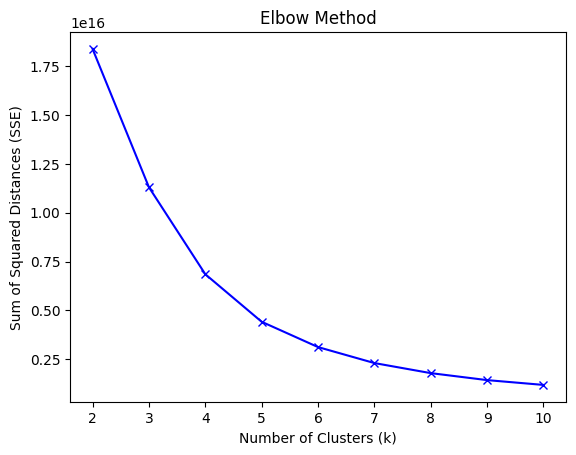

In [30]:
# Plot the Elbow Method results
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method')
plt.show()

In [174]:
k = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(dataset[features])

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [175]:
dataset1 = dataset[features].sample(10000, random_state=42)

In [176]:
combinations = []
combinations.extend(list(itertools.combinations(features, 3)))

In [177]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(dataset1.values)
df = pd.DataFrame(scaled_X,columns=dataset1.columns)

In [178]:
results = {}
count = 0
for combination in combinations:
    kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
    kmeans.fit(df[list(combination)])
    spotify_dataKmeans = dataset.sample(10000, random_state=42)
    spotify_dataKmeans['cluster_label'] = kmeans.predict(df[list(combination)])
    x = metrics.calinski_harabasz_score(df[list(combination)], spotify_dataKmeans['cluster_label'])
    results[combination] = x
    count += 1
    if (count%1000 == 0):
        print(count)

In [179]:
max_entry = max(results.items(), key=lambda x: x[1])

max_key = max_entry[0]
max_value = max_entry[1]
print(f'{max_key}: {max_value}')

('energy', 'mode', 'acousticness'): 15249.740103557004


In [146]:
import heapq

top_5_values = heapq.nlargest(10, results.values())

# Find the keys corresponding to the top 5 values
top_5_keys = [key for key, value in results.items() if value in top_5_values]

print("Top 5 values:")
for value in top_5_values:
    print(value)

print("\nKeys corresponding to the top 5 values:")
for key in top_5_keys:
    print(key)

Top 5 values:
9509.677059486841
8695.135963065013
8388.567127578788
7797.979716995664
7603.804246626666
7564.71032486188
7300.493078523487
7203.858689640193
7021.0382256318
6926.432357086039

Keys corresponding to the top 5 values:
('danceability', 'energy', 'loudness', 'acousticness')
('energy', 'key', 'loudness', 'acousticness')
('energy', 'loudness', 'mode', 'acousticness')
('energy', 'loudness', 'speechiness', 'acousticness')
('energy', 'loudness', 'acousticness', 'instrumentalness')
('energy', 'loudness', 'acousticness', 'liveness')
('energy', 'loudness', 'acousticness', 'valence')
('energy', 'mode', 'speechiness', 'acousticness')
('energy', 'mode', 'acousticness', 'liveness')
('energy', 'acousticness', 'instrumentalness', 'liveness')


## Recommender system

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

In [30]:
dataset.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [31]:
features = ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature']

metadata_cols = ['name', 'artists', 'year']

In [32]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=8, 
                                   verbose=2))],verbose=True)
X = dataset[features]
song_cluster_pipeline.fit(X)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s


e:\UOC\3r any\TFM\spotify_TFM\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 12958670.31134768.
Iteration 1, inertia 9936632.437737577.
Iteration 2, inertia 9622118.674419435.
Iteration 3, inertia 9432547.225603113.
Iteration 4, inertia 9359503.463036746.
Iteration 5, inertia 9327081.417539068.
Iteration 6, inertia 9304939.582052406.
Iteration 7, inertia 9290305.76365933.
Iteration 8, inertia 9280980.379735885.
Iteration 9, inertia 9273806.952090962.
Iteration 10, inertia 9266617.936767403.
Iteration 11, inertia 9257494.32833495.
Iteration 12, inertia 9244069.691838343.
Iteration 13, inertia 9219285.264348086.
Iteration 14, inertia 9169610.935800334.
Iteration 15, inertia 9100810.54761194.
Iteration 16, inertia 9067652.438001292.
Iteration 17, inertia 9062664.414677294.
Iteration 18, inertia 9061550.875114337.
Iteration 19, inertia 9061234.256006556.
Iteration 20, inertia 9061115.31445116.
Iteration 21, inertia 9061055.794608183.
Iteration 22, inertia 9061011.098406969.
Iteration 23, inertia 9060969.84592012.
Iterati

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(verbose=2))],
         verbose=True)

In [33]:
#recent_tracks = getUserRecentTracks()

In [37]:
test_songs = {'Real World Issues': '7e8hMGloFiBY41KTj4L5af',
 'Radio I': '47qR4CGBFotoikUw736sfW',
 'Serenata': '2FqhAymeIpWM9McMg0uqcl'}

In [38]:
def input_preprocessor(song_list, dataset):
    song_vectors = []
    for song in song_list:
        try:
            song_data = dataset.loc[dataset['id'] == song_list[song]].iloc[0]
        except IndexError:
            song_data = None
            
        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song))
            continue
            
        song_vectors.append(song_data[features].values)  

    return np.mean(np.array(list(song_vectors)), axis=0)

In [206]:
'''
def input_preprocessor(song_list, dataset):
    song_vectors = []
    for song in song_list:
        try:
            song_data = dataset[dataset['id'] == song_list[song]].iloc[0]
        except IndexError:
            song_data = None
            
        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song))
            continue
            
        song_vectors.append(song_data[features].values)  

    return np.mean(np.array(list(song_vectors)), axis=0)
'''

In [47]:
input_preprocessor({'Real World Issues': '7e8hMGloFiBY41KTj4L5af',
 'Radio I': '47qR4CGBFotoikUw736sfW',
 'Serenata': '2FqhAymeIpWM9McMg0uqcl'}, dataset)

array([0.30233333333333334, 0.18313333333333337, 2.0, -22.84633333333333,
       0.6666666666666666, 0.30500000000000005, 0.8393333333333333, 0.581,
       0.20496666666666666, 0.32776666666666665, 55.703,
       220065.33333333334, 2.0], dtype=object)

In [40]:
def Music_Recommender(song_list, dataset, n_songs=10):

    #groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, dataset)
    
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(dataset[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    
    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    
    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = dataset.iloc[index]
  
    
    return rec_output[metadata_cols]

In [44]:
results = Music_Recommender([{'Real World Issues': '7e8hMGloFiBY41KTj4L5af',
 'Radio I': '47qR4CGBFotoikUw736sfW',
 'Serenata': '2FqhAymeIpWM9McMg0uqcl'}],dataset)

TypeError: list indices must be integers or slices, not dict

In [1]:
recent_tracks = getUserRecentTracks()

NameError: name 'getUserRecentTracks' is not defined

In [215]:
recent_tracks

{'Highway to Hell': '2zYzyRzz6pRmhPzyfMEC8s',
 "Livin' On A Prayer": '37ZJ0p5Jm13JPevGcx4SkF',
 'Ashes of the Dawn': '02kCXxQSaaVZiyXZMQWgpA',
 'Injection': '75rAjnPV6h0RgSORx2dUPi',
 'RAISE MY SWORD': '4N98sfqOlMlP1iO7kuW0t9',
 'Master Of Puppets': '2MuWTIM3b0YEAskbeeFE1i',
 'RUN TO THE EDGE': '1scaaSoeewj4hW0cNG5yW4',
 'Fear of the Dark - 2015 Remaster': '6p8eFfPw3nQkf37aT3AkmK',
 'Violent Revolution': '712ukvLX20rwHuTWg7Gcjb',
 'Hangar 18 - 2004 Remix': '6b6uLZsoGhObYexIxnRbIb'}

In [211]:
recent_tracks.values()

dict_values(['2zYzyRzz6pRmhPzyfMEC8s', '37ZJ0p5Jm13JPevGcx4SkF', '02kCXxQSaaVZiyXZMQWgpA', '75rAjnPV6h0RgSORx2dUPi', '4N98sfqOlMlP1iO7kuW0t9', '2MuWTIM3b0YEAskbeeFE1i', '1scaaSoeewj4hW0cNG5yW4', '6p8eFfPw3nQkf37aT3AkmK', '712ukvLX20rwHuTWg7Gcjb', '6b6uLZsoGhObYexIxnRbIb'])

In [212]:
recent_tracks_info = getSongInformation(recent_tracks.values())

Max Retries reached


In [213]:
df_tracks = pd.DataFrame(recent_tracks_info)

ValueError: DataFrame constructor not properly called!

In [ ]:
df1 = df_tracks.head(1)[features]

In [ ]:
df1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.769,0.724,11,-5.12,1,0.0864,0.548,0.0,0.161,0.464,110.659,190528,5


In [ ]:
scaler = song_cluster_pipeline.steps[0][1]

In [ ]:
scaled_data = scaler.transform(df1)

In [ ]:
scaled_data

array([[ 1.45488585,  0.72777348,  1.64158584,  0.95796874,  0.69949135,
         0.01739693,  0.2628399 , -0.75171348, -0.22498156,  0.13315116,
        -0.22546954, -0.35948621,  2.08043374]])

In [ ]:
kmeans_model = song_cluster_pipeline.steps[1][1]

In [ ]:
predicted_cluster = kmeans_model.predict(scaled_data)

In [ ]:
predicted_cluster[0]

5

In [ ]:
predicted_cluster_songs = []
for i in range(len(dataset)):
    if kmeans_model.labels_[i] == predicted_cluster[0]:
        predicted_cluster_songs.append(dataset.iloc[i])

In [ ]:
scaled_data

array([[ 1.45488585,  0.72777348,  1.64158584,  0.95796874,  0.69949135,
         0.01739693,  0.2628399 , -0.75171348, -0.22498156,  0.13315116,
        -0.22546954, -0.35948621,  2.08043374]])

In [ ]:
scaled_data = scaled_data.flatten()

In [ ]:
scaled_data.shape

(13,)

In [ ]:
from scipy.spatial.distance import euclidean

distances = []
for song in predicted_cluster_songs:
    distance = euclidean(scaled_data, song[['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature']].to_numpy())
    distances.append(distance)

In [ ]:
np.argmin(distances)

181743

In [ ]:
# Step 5: Find the closest song
closest_song_index = np.argmin(distances)
closest_song = predicted_cluster_songs[closest_song_index]

In [ ]:
closest_song_index

181743

In [ ]:
predicted_cluster_songs[closest_song_index]

id                      4PL095bbFk1QlDIrWsEtTd
name                              Staletto 135
album                         Los Alamos Grind
album_id                6R4GhVYElJOBUxScudo2Mm
artists                  ['The Royal Jesters']
artist_ids          ['0VB1seSRe8CTJZAFosZZVC']
track_number                                12
disc_number                                  1
explicit                                     0
danceability                             0.605
energy                                   0.799
key                                          5
loudness                                -4.995
mode                                         1
speechiness                             0.0855
acousticness                             0.731
instrumentalness                         0.929
liveness                                0.0762
valence                                  0.981
tempo                                  156.622
duration_ms                              15144
time_signatur